In [28]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

In [2]:
df_econ=pd.read_csv("df_econ.csv")
df_econ.rename(columns = {'Unnamed: 0':'yyyymm'}, inplace = True) 
df_econ.set_index('yyyymm',inplace=True)
df_genre=pd.read_csv('smoothed_genre_share.csv')
df_genre.set_index('date',inplace=True)

In [4]:
df_genre

,Action,Adventure,Comedy,Drama,Horror,Thriller/Suspense
date,,,,,,
200601,0.152123,0.231897,0.274552,0.230195,0.111233,0.000000
200602,0.076489,0.344049,0.239367,0.132611,0.156461,0.051024
200603,0.183584,0.283096,0.225794,0.100863,0.115545,0.091117
200604,0.069127,0.223197,0.331895,0.211193,0.101817,0.062772
200605,0.337402,0.251132,0.097115,0.083424,0.061260,0.169667
...,...,...,...,...,...,...
202008,0.064088,0.333316,0.017838,0.152130,0.278801,0.153826
202009,0.365839,0.029619,0.025398,0.055688,0.344820,0.178635
202010,0.261801,0.027584,0.101303,0.048280,0.365740,0.195292


In [5]:
data=pd.concat([df_econ,df_genre],axis=1,join="inner")
data

,inflation,S&Pyield,unemployment,UMCSENT,homeindex,UMCSENT.1,Action,Adventure,Comedy,Drama,Horror,Thriller/Suspense
200601,0.091619,0.305601,4.7,86.7,0.0914,86.7,0.152123,0.231897,0.274552,0.230195,0.111233,0.000000
200602,0.026267,0.005438,4.8,88.9,0.0914,88.9,0.076489,0.344049,0.239367,0.132611,0.156461,0.051024
200603,0.068548,0.133150,4.7,87.4,0.0914,87.4,0.183584,0.283096,0.225794,0.100863,0.115545,0.091117
200604,0.098229,0.145868,4.7,79.1,0.0710,79.1,0.069127,0.223197,0.331895,0.211193,0.101817,0.062772
200605,0.059652,-0.371003,4.6,84.9,0.0710,84.9,0.337402,0.251132,0.097115,0.083424,0.061260,0.169667
...,...,...,...,...,...,...,...,...,...,...,...,...
202008,0.037833,0.840776,8.4,80.4,0.0808,80.4,0.064088,0.333316,0.017838,0.152130,0.278801,0.153826
202009,0.016722,-0.470736,7.8,81.8,0.0808,81.8,0.365839,0.029619,0.025398,0.055688,0.344820,0.178635
202010,0.004987,-0.331989,6.9,76.9,0.1077,76.9,0.261801,0.027584,0.101303,0.048280,0.365740,0.195292
202011,-0.007338,1.290548,6.7,80.7,0.1077,80.7,0.209019,0.139752,0.080936,0.042515,0.336673,0.191106


In [6]:
# turn the index back into a read date for better graphing
dt=[]
for value in data.index.values:
    blurp=datetime.datetime(value//100,int(value%100),1)
    dt.append(blurp)
data['date']=dt
data.set_index(['date'],inplace=True)
data

,inflation,S&Pyield,unemployment,UMCSENT,homeindex,UMCSENT.1,Action,Adventure,Comedy,Drama,Horror,Thriller/Suspense
date,,,,,,,,,,,,
2006-01-01,0.091619,0.305601,4.7,86.7,0.0914,86.7,0.152123,0.231897,0.274552,0.230195,0.111233,0.000000
2006-02-01,0.026267,0.005438,4.8,88.9,0.0914,88.9,0.076489,0.344049,0.239367,0.132611,0.156461,0.051024
2006-03-01,0.068548,0.133150,4.7,87.4,0.0914,87.4,0.183584,0.283096,0.225794,0.100863,0.115545,0.091117
2006-04-01,0.098229,0.145868,4.7,79.1,0.0710,79.1,0.069127,0.223197,0.331895,0.211193,0.101817,0.062772
2006-05-01,0.059652,-0.371003,4.6,84.9,0.0710,84.9,0.337402,0.251132,0.097115,0.083424,0.061260,0.169667
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.037833,0.840776,8.4,80.4,0.0808,80.4,0.064088,0.333316,0.017838,0.152130,0.278801,0.153826
2020-09-01,0.016722,-0.470736,7.8,81.8,0.0808,81.8,0.365839,0.029619,0.025398,0.055688,0.344820,0.178635
2020-10-01,0.004987,-0.331989,6.9,76.9,0.1077,76.9,0.261801,0.027584,0.101303,0.048280,0.365740,0.195292


In [7]:
X=data[['inflation','S&Pyield','unemployment','UMCSENT','homeindex']]
X

,inflation,S&Pyield,unemployment,UMCSENT,homeindex
date,,,,,
2006-01-01,0.091619,0.305601,4.7,86.7,0.0914
2006-02-01,0.026267,0.005438,4.8,88.9,0.0914
2006-03-01,0.068548,0.133150,4.7,87.4,0.0914
2006-04-01,0.098229,0.145868,4.7,79.1,0.0710
2006-05-01,0.059652,-0.371003,4.6,84.9,0.0710
...,...,...,...,...,...
2020-08-01,0.037833,0.840776,8.4,80.4,0.0808
2020-09-01,0.016722,-0.470736,7.8,81.8,0.0808
2020-10-01,0.004987,-0.331989,6.9,76.9,0.1077


In [8]:
data_scaler=StandardScaler()
X_scaled=data_scaler.fit_transform(X)
X_scaled

array([[ 1.60522064e+00,  4.21845110e-01, -7.26102868e-01,
         3.40933895e-01,  1.29224623e+00],
       [ 1.64561750e-01, -1.52716340e-01, -6.80956576e-01,
         5.22082188e-01,  1.29224623e+00],
       [ 1.09664354e+00,  9.17448606e-02, -7.26102868e-01,
         3.98571988e-01,  1.29224623e+00],
       [ 1.75094984e+00,  1.16089384e-01, -7.26102868e-01,
        -2.84851116e-01,  9.02191881e-01],
       [ 9.00525513e-01, -8.73285358e-01, -7.71249161e-01,
         1.92721656e-01,  9.02191881e-01],
       [ 1.52532008e-01, -1.61136237e-01, -7.71249161e-01,
         1.76253629e-01,  9.02191881e-01],
       [ 3.68937746e-01, -4.63029676e-02, -7.26102868e-01,
        -4.60647299e-02,  4.14623947e-01],
       [ 1.49648535e-01,  3.25541797e-01, -7.26102868e-01,
         2.33891722e-01,  4.14623947e-01],
       [-1.71357421e+00,  4.01161294e-01, -8.16395453e-01,
         9.09080813e-01,  4.14623947e-01],
       [-1.85053486e+00,  5.60611897e-01, -8.61541745e-01,
         7.85570613e-01

In [9]:
y=data[['Action']]
y

,Action
date,
2006-01-01,0.152123
2006-02-01,0.076489
2006-03-01,0.183584
2006-04-01,0.069127
2006-05-01,0.337402
...,...
2020-08-01,0.064088
2020-09-01,0.365839
2020-10-01,0.261801


In [19]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
model.score(X,y)


0.5858009322544628

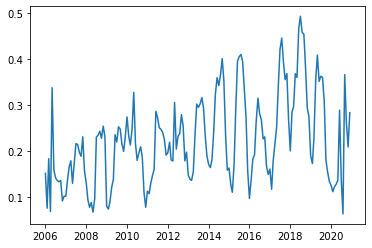

In [11]:
plt.plot(y)



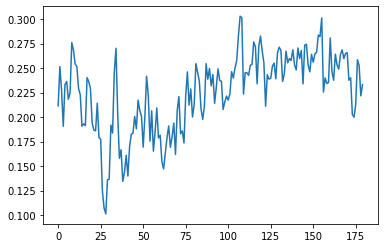

In [12]:
plt.plot(y_pred)

In [13]:
y_pred

array([[0.21155437],
       [0.25154131],
       [0.22719253],
       [0.19057737],
       [0.23316118],
       [0.23637908],
       [0.2182649 ],
       [0.224769  ],
       [0.27605467],
       [0.2682314 ],
       [0.2541426 ],
       [0.25160929],
       [0.22907833],
       [0.22268142],
       [0.19077132],
       [0.19309321],
       [0.19134399],
       [0.2402703 ],
       [0.23618058],
       [0.22894796],
       [0.19375333],
       [0.18672792],
       [0.18601401],
       [0.21422059],
       [0.17915224],
       [0.17733538],
       [0.12479799],
       [0.10712879],
       [0.10115543],
       [0.13608559],
       [0.13647554],
       [0.19184671],
       [0.18377179],
       [0.24512859],
       [0.27027436],
       [0.20446638],
       [0.1579884 ],
       [0.1666693 ],
       [0.13441266],
       [0.14365738],
       [0.16104581],
       [0.13986583],
       [0.16979809],
       [0.18241932],
       [0.18361553],
       [0.2006667 ],
       [0.18808563],
       [0.217

<ipython-input-15-5de5359f998c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qwell['linear']=y_pred


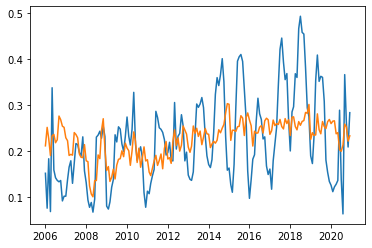

In [15]:
qwell=y
qwell['linear']=y_pred
plt.plot(qwell)
    



In [20]:
# let's loop through the column for fun, plot each on
data.columns

Index(['inflation', 'S&Pyield', 'unemployment', 'UMCSENT', 'homeindex',
       'UMCSENT.1', 'Action', 'Adventure', 'Comedy', 'Drama', 'Horror',
       'Thriller/Suspense'],
      dtype='object')

<ipython-input-31-4c66b2eb8d3b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['linear']=y_pred
<ipython-input-31-4c66b2eb8d3b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['linear']=y_pred
<ipython-input-31-4c66b2eb8d3b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

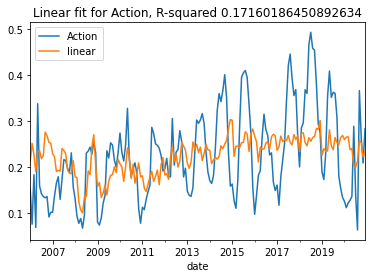

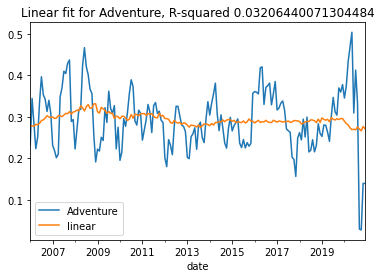

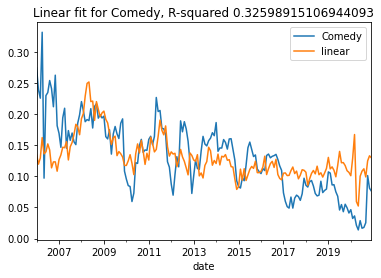

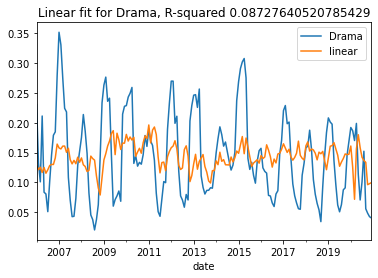

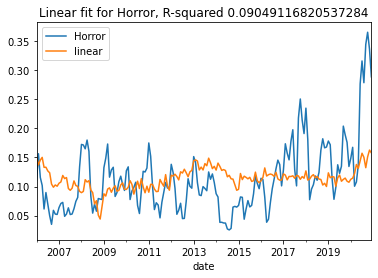

In [31]:
with PdfPages('ColumnTest.pdf') as pdf:
    for column in data.columns[6:]:
        y=data[[column]]
        model=LinearRegression()
        model.fit(X,y)
        y_pred=model.predict(X)
        r2=model.score(X,y)
        plot_df=y
        plot_df['linear']=y_pred
        plot_title=f'Linear fit for {column}, R-squared {r2}'
        plot_df.plot.line(title=plot_title)
        pdf.savefig()
    plt.close()
    
    
    
        